# Course1: Foundation of Information
Project-1: Using web scraping to build a database of movie related
information from: The Movie Database (TMDB) movie data

# Problem statement:
A common business requirement in the context of information gathering is to extract and filter relevant
data from web pages that host this information. However, access to information spread over several
web pages, hosted potentially on multiple websites is a cumbersome process and we cannot rely on
manual procedures to execute this task. In this project, you will employ a programmatic approach to
access, parse and extract relevant information from a website of interest.

# Objective:
The project's goal is to extract data (from a chosen number of pages) from The Movie Database website
(https://www.themoviedb.org/) into a tabular data format so that further analysis (e.g., details about a
movie's genre, cast, and user rating) can be facilitated.
To execute this project, you will have to read the documentation links provided against each task in the
assignment and adapt the code examples provided in the documentation for the task at hand

**Step 1** : establish connection to https://www.themoviedb.org/ , verify the status code and if the status code is 200 then and display the first 200 chars.

In [1]:
import requests

#define url and headers needed
url = 'https://www.themoviedb.org/movie'
needed_headers = {'User-Agent': "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"}

#get response
response = requests.get(url, headers=needed_headers)

#store status code and print
status_code = response.status_code
print(f'status code:{status_code}')

#check if status_code == 200 and print the first 200 of the page content
if status_code == 200:
  page_content = response.content
  print(page_content[:200])
else:
  print(f'status code:{status_code}')
  print(response.text)

status code:200
b'<!DOCTYPE html>\n<html lang="en" class="no-js">\n  <head>\n    <title>Popular Movies &#8212; The Movie Database (TMDB)</title>\n    <meta http-equiv="cleartype" content="on">\n    <meta charset="utf-8">\n  '


**Step 2**: Parse the content of HTML response using the BeautifulSoup, and extract title of the page

In [3]:
import requests
from bs4 import BeautifulSoup

#define url and headers needed
url = 'https://www.themoviedb.org/movie'
needed_headers = {'User-Agent': "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"}

#get response
response = requests.get(url, headers=needed_headers)

#store status code and print
status_code = response.status_code
print(f'status code:{status_code}')

#check if status_code == 200 and print the first 200 of the page content
if status_code == 200:
  page_content = response.content
  # print(page_content[:200])
  # bs4 instance and print the title
  soup = BeautifulSoup(page_content, 'html.parser')
  print(soup.title.text)
else:
  print(f'status code:{status_code}')
  print(response.text)

status code:200
Popular Movies — The Movie Database (TMDB)


 **Step 3**: then define a user function that accepts url and presents a bs4 instance , the user function must have exceptions if the url are incorrect/malformed .
then write 2 test cases one for 200 OK and 404 NOT FOUND

In [4]:
def scrape_and_prase(url):
    #get response with the headers defined
    try:
        needed_headers = {'User-Agent': "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"}
        response = requests.get(url, headers=needed_headers)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        raise ValueError(f"Failed to fetch the URL: {e}")

    # retrun bs4 instance
    return BeautifulSoup(response.content, 'html.parser')

def test_scrape_and_prase(url):
    # a common function for testing
    try:
        data = scrape_and_prase(url)
        print(f"Title : {data.title.string}")
    except ValueError as e:
        print(f"Error : {e}")



In [5]:
    #200 OK
    test_scrape_and_prase('https://www.themoviedb.org/movie')
    #404 NOT FOUND
    test_scrape_and_prase('https://www.themoviedb.org/movieFALSE')


Title : Popular Movies — The Movie Database (TMDB)
Error : Failed to fetch the URL: 404 Client Error: Not Found for url: https://www.themoviedb.org/movieFALSE


Extract the content of the webpage - https://www.themoviedb.org/movie - that hosts a
current dated listing of popular movies.
1. store reponse of scrape_and_prase() in a variable
2. display the contents related for first movie
3. display the name and rating and movie url

below is the method for path selection for the above contents

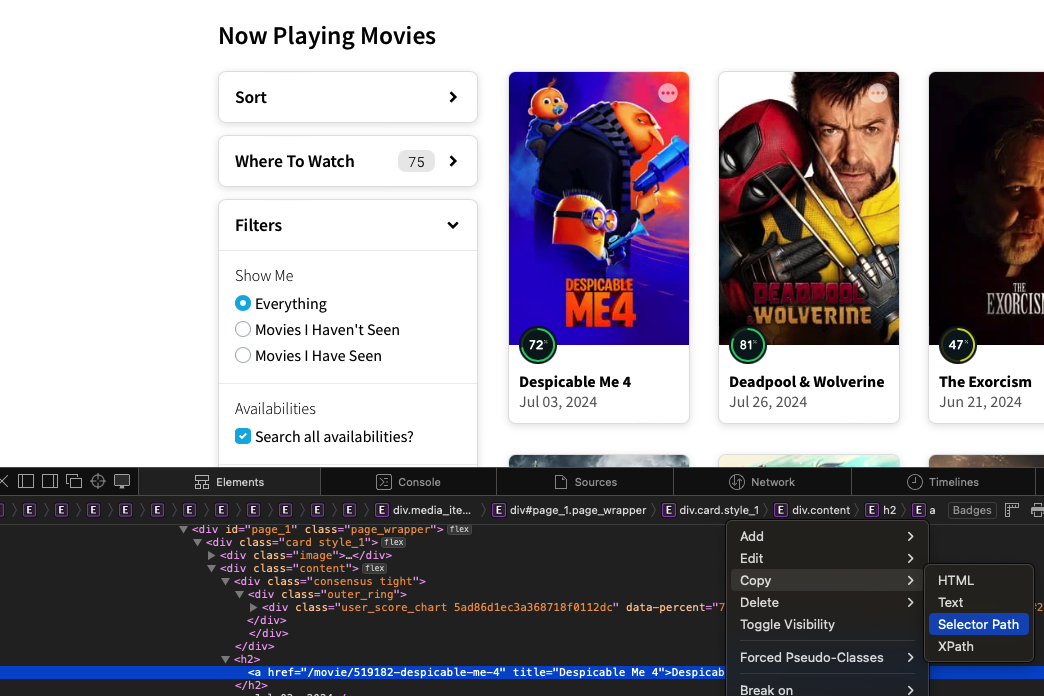

In [6]:
import requests
from bs4 import BeautifulSoup

# a user defined function to get the first movie data
def get_first_movie_meta(data):

    # look for the first page and the first child
    first_card = data.select_one('#page_1 > div:nth-child(1)')

    # condition to heck that its the first movie
    if not first_card:
        raise ValueError("not the first movie")

    # get the elements for the cards then get the name and rating
    movie_name_ele=first_card.select_one('div.content > h2 > a')
    movie_name= movie_name_ele.get_text(strip=True) if movie_name_ele else 'n/a'
    movie_url=movie_name_ele.get('href') if movie_name_ele else 'n/a'

    movie_rating_ele=first_card.select_one('div.content > div.consensus > div.outer_ring > div.user_score_chart')
    movie_rating=movie_rating_ele['data-percent'] if movie_rating_ele else 'not rated'

    return movie_name, movie_rating , movie_url

In [7]:
def get_tmdb_content(url):
  # use try catch for any unreachable url etc..
    try:
        tmdb_content = scrape_and_prase(url)
        # print(f"Title : {tmdb_content}")

        # extract the variables from the content
        first_movie_name , first_movie_rating, first_movie_url = get_first_movie_meta(tmdb_content)
        print(f" first movie name: {first_movie_name}")
        print(f" movie rating is: {first_movie_rating}")
        print(f" movie url is: {first_movie_url}")

    except ValueError as e:
        print(f"Error : {e}")

In [8]:
        # define the url and call the defined function
        url = f"https://www.themoviedb.org/movie/now-playing?page=1"
        get_tmdb_content(url)

 first movie name: Despicable Me 4
 movie rating is: 72
 movie url is: /movie/519182-despicable-me-4


Write user defined functions for getting all the movies in the page and navigate to the movie details page and get the following
1. titles
2. rating
3. movie_url
4. movie_url.genres
5. movie_url.cast

When the rating is not available, the value “not rated” should
be appended to the list created

In [9]:
# function to return movie_info
def get_all_movie_info(data):

    movie_info=[]
    # movie=data.select('#page_1 > div.card.style_1')
    # use the next selector as we'd need to iterate thru pages
    movie=data.select('div.card.style_1')

    # iteration to get the related details
    for movie in movie:
        movie_name_ele=movie.select_one('div.content > h2 > a')
        movie_name= movie_name_ele.get_text(strip=True) if movie_name_ele else 'n/a'
        movie_url=movie_name_ele.get('href') if movie_name_ele else 'n/a'

        movie_rating_ele=movie.select_one('div.content > div.consensus > div.outer_ring > div.user_score_chart')
        movie_rating=movie_rating_ele['data-percent'] if movie_rating_ele else 'not rated'

        # condition added to remove movies which don't have data , so that our collected data is cleaner
        if movie_name and movie_name.lower() !='n/a':
          movie_info.append((movie_name,movie_rating,movie_url))

    return movie_info

In [10]:
# function to drill into the movie url and get more details
def get_movie_details(url):
    base_url = "https://www.themoviedb.org"
    full_url = f"{base_url}{url}"

    # Check if the URL is empty or null , had to put that in to handel edge cases
    if not url:
        print("empty url.")
        return ['n/a'],['n/a']

    try:
        data = scrape_and_prase(full_url)

        # Extract genres
        movie_genres_ele = data.select('#original_header > div.header_poster_wrapper.false > section > div.title.ott_false > div > span.genres > a')
        movie_genres = [genre.get_text(strip=True) for genre in movie_genres_ele]

        # Extract cast
        movie_cast_ele = data.select('#cast_scroller > ol > li > p:nth-child(2) > a')
        movie_cast = [actor.get_text(strip=True) for actor in movie_cast_ele]
        return movie_genres, movie_cast
    except ValueError as e:
        # print(f"Error : {e}")
        return ['n/a'],['n/a']

In [11]:
# function to get the full dataset
def get_tmdb_content(url):
    try:
        tmdb_content = scrape_and_prase(url)
        all_movies_info = get_all_movie_info(tmdb_content)

        for movie_no,(movie_name,movie_rating,movie_url) in enumerate(all_movies_info, start=1):
            print(f" movie no: {movie_no}")
            print(f" movie name: {movie_name}")
            print(f" movie rating is: {movie_rating}")
            print(f" movie  url is: {movie_url}")

            movie_genres, movie_cast = get_movie_details(movie_url)
            print(f"  Genres: {', '.join(movie_genres)}")
            print(f"  Cast: {', '.join(movie_cast)}")

    except ValueError as e:
        print(f"Error : {e}")

In [12]:
        url = f"https://www.themoviedb.org/movie/now-playing?page=1"
        get_tmdb_content(url)

 movie no: 1
 movie name: Despicable Me 4
 movie rating is: 72
 movie  url is: /movie/519182-despicable-me-4
  Genres: Animation, Family, Comedy, Action
  Cast: Steve Carell, Kristen Wiig, Joey King, Will Ferrell, Sofía Vergara, Miranda Cosgrove, Dana Gaier, Madison Polan, Pierre Coffin
 movie no: 2
 movie name: Deadpool & Wolverine
 movie rating is: 82
 movie  url is: /movie/533535-deadpool-wolverine
  Genres: Science Fiction, Action, Comedy
  Cast: Ryan Reynolds, Hugh Jackman, Emma Corrin, Matthew Macfadyen, Morena Baccarin, Rob Delaney, Leslie Uggams, Aaron Stanford, Tyler Mane
 movie no: 3
 movie name: The Exorcism
 movie rating is: 47
 movie  url is: /movie/646683-the-exorcism
  Genres: 
  Cast: Russell Crowe, Ryan Simpkins, Sam Worthington, Chloe Bailey, Adam Goldberg, David Hyde Pierce, Adrian Pasdar, Tracey Bonner, Samantha Mathis
 movie no: 4
 movie name: A Quiet Place: Day One
 movie rating is: 69
 movie  url is: /movie/762441-a-quiet-place-day-one
  Genres: Horror, Science F

Write an user defined function that returns a pandas data frame with following data:

1. Titles of the movies listed on the page
2. User ratings of the movies listed on the page
3. Genres of the movies listed on the page
4. Cast of the movies listed on the page

In [13]:
import pandas as pd

# copy of the previous function now using pandas and exporting a df
def get_movie_details_df(url):
    data = scrape_and_prase(url)
    movies_info = get_all_movie_info(data)

    movies_data = []
    for movie_name, movie_rating, movie_url in movies_info:
        movie_genres, movie_cast = get_movie_details(movie_url)
        movies_data.append({
            'movie_title': movie_name,
            'movie_user_rating': movie_rating,
            'movie_genres': ', '.join(movie_genres),
            'movie_cast': ', '.join(movie_cast)
        })

    return pd.DataFrame(movies_data)

In [14]:
# function to collect the data into the df
def get_tmdb_content_df(url):
    try:
        df=get_movie_details_df(url)
        print(df)
    except ValueError as e:
        print(f"Error : {e}")

In [15]:
        url = f"https://www.themoviedb.org/movie/now-playing?page=1"
        get_tmdb_content_df(url)

                              movie_title movie_user_rating  \
0                         Despicable Me 4                72   
1                    Deadpool & Wolverine                82   
2                            The Exorcism                47   
3                  A Quiet Place: Day One                69   
4                                Twisters                73   
5   Horizon: An American Saga - Chapter 1                70   
6                                Longlegs                68   
7                          The Bikeriders                70   
8      BLUE LOCK THE MOVIE -EPISODE NAGI-                83   
9                           The Lion King                83   
10                               MaXXXine                70   
11                     Fly Me to the Moon                73   
12                                 Thelma                71   
13                      Kinds of Kindness                69   
14                            A Sacrifice              

Scraping the data and combining the dataframes

1. Write a function that scrapes data from page number 1, 2, 3, 4 and 5 on
the URL https://www.themoviedb.org/movie and returns 5 data frames which can be exported to csv file by calling the functions defined

In [16]:
def get_tmdb_content_df_extended(url,page):
    try:
        df=get_movie_details_df(url)
        print(df)
        df.to_csv(f"tmdb-{page}.csv", index=False)
    except ValueError as e:
        print(f"Error : {e}")

In [17]:
    for page in range(1, 6):
        url = f"https://www.themoviedb.org/movie/now-playing?page={page}"
        get_tmdb_content_df_extended(url,page)


                              movie_title movie_user_rating  \
0                         Despicable Me 4                72   
1                    Deadpool & Wolverine                82   
2                            The Exorcism                47   
3                  A Quiet Place: Day One                69   
4                                Twisters                73   
5   Horizon: An American Saga - Chapter 1                70   
6                                Longlegs                68   
7                          The Bikeriders                70   
8      BLUE LOCK THE MOVIE -EPISODE NAGI-                83   
9                           The Lion King                83   
10                               MaXXXine                70   
11                     Fly Me to the Moon                73   
12                                 Thelma                71   
13                      Kinds of Kindness                69   
14                            A Sacrifice              

Combine the data obtained from dataframes

In [18]:
# concatinate files and print the final df , the schema of the csv's are same so a simple contact would work
files = ["tmdb-1.csv", "tmdb-2.csv", "tmdb-3.csv", "tmdb-4.csv"]
dfs = [pd.read_csv(file) for file in files]
final_df=pd.concat(dfs,ignore_index=False)
# print
# print(final_df.info())
# print(final_df.info())
# print(final_df.describe())
# print(final_df.head(100))
# print(final_df.tail())
# print(final_df.shape)
print(final_df)

                         movie_title  movie_user_rating  \
0                    Despicable Me 4                 72   
1               Deadpool & Wolverine                 82   
2                       The Exorcism                 47   
3             A Quiet Place: Day One                 69   
4                           Twisters                 73   
..                               ...                ...   
15                             Ijbol                  0   
16                       Bull Street                  0   
17                            T. REX                 70   
18                          Fish Boy                  0   
19  Rice Girl: My Redneck Neighbor 2                  0   

                         movie_genres  \
0   Animation, Family, Comedy, Action   
1     Science Fiction, Action, Comedy   
2                                 NaN   
3   Horror, Science Fiction, Thriller   
4            Action, Adventure, Drama   
..                                ...   
15  